In [1]:

from langgraph.graph import StateGraph, START, END
from langgraph.types import Command
from typing import TypedDict

class State(TypedDict):
    text: str


In [2]:

def node_a(state: State): 
    print("Node A")
    return Command(
        goto="node_b", 
        update={
            "text": state["text"] + "a"
        }
    )

def node_b(state: State): 
    print("Node B")
    return Command(
        goto="node_c", 
        update={
            "text": state["text"] + "b"
        }
    )


def node_c(state: State): 
    print("Node C")
    return Command(
        goto=END, 
        update={
            "text": state["text"] + "c"
        }
    )


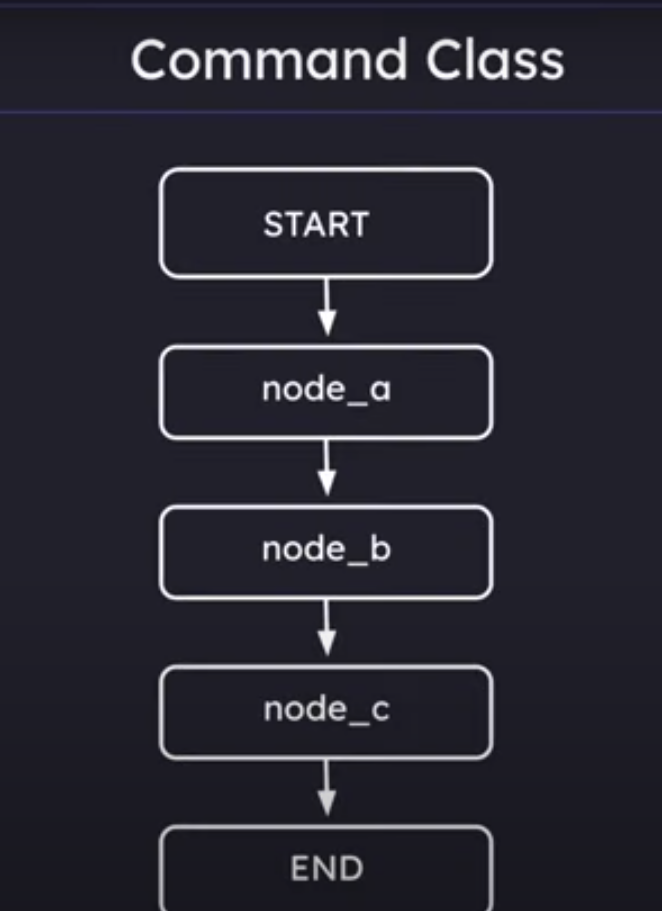

In [3]:
graph = StateGraph(State)

graph.add_node("node_a", node_a)
graph.add_node("node_b", node_b)
graph.add_node("node_c", node_c)

graph.set_entry_point("node_a")


app = graph.compile()

response = app.invoke({
    "text": ""
})

Task node_c with path ('__pregel_pull', 'node_c') wrote to unknown channel branch:to:__end__, ignoring it.


Node A
Node B
Node C


In [4]:
response

{'text': 'abc'}